# HOUSING: PRICE PREDICTION


In [3]:
# Importing required libraries

import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Connect to the dataset and import to jupyter file
df= pd.read_csv("train.csv")

In [13]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [14]:
#shape
df.shape

(1168, 81)

In [15]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
pd.set_option('display.max_rows',None)
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
Street            0.000000
Alley            93.407534
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.599315
MasVnrArea        0.599315
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.568493
BsmtCond          2.568493
BsmtExposure      2.654110
BsmtFinType1      2.568493
BsmtFinSF1        0.000000
BsmtFinType2      2.654110
BsmtFinSF2        0.000000
B

<AxesSubplot:>

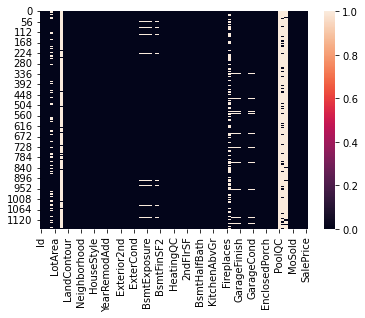

In [17]:
#null values using heatmap
sns.heatmap(df.isnull())

In [18]:
# Delete features which have more missing values

df=df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], axis=1)

In [19]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [20]:
df.shape

(1168, 76)

In [21]:
# Find unique values in each feature
for i in df.columns:
    print(df[i].nunique(), i)

1168 Id
15 MSSubClass
5 MSZoning
106 LotFrontage
892 LotArea
2 Street
4 LotShape
4 LandContour
1 Utilities
5 LotConfig
3 LandSlope
25 Neighborhood
9 Condition1
8 Condition2
5 BldgType
8 HouseStyle
10 OverallQual
9 OverallCond
110 YearBuilt
61 YearRemodAdd
6 RoofStyle
8 RoofMatl
14 Exterior1st
15 Exterior2nd
4 MasVnrType
283 MasVnrArea
4 ExterQual
5 ExterCond
6 Foundation
4 BsmtQual
4 BsmtCond
4 BsmtExposure
6 BsmtFinType1
551 BsmtFinSF1
6 BsmtFinType2
122 BsmtFinSF2
681 BsmtUnfSF
636 TotalBsmtSF
6 Heating
5 HeatingQC
2 CentralAir
5 Electrical
669 1stFlrSF
351 2ndFlrSF
21 LowQualFinSF
746 GrLivArea
4 BsmtFullBath
3 BsmtHalfBath
4 FullBath
3 HalfBath
8 BedroomAbvGr
4 KitchenAbvGr
4 KitchenQual
12 TotRmsAbvGrd
7 Functional
4 Fireplaces
6 GarageType
97 GarageYrBlt
3 GarageFinish
5 GarageCars
392 GarageArea
5 GarageQual
5 GarageCond
3 PavedDrive
244 WoodDeckSF
176 OpenPorchSF
106 EnclosedPorch
18 3SsnPorch
65 ScreenPorch
8 PoolArea
20 MiscVal
12 MoSold
5 YrSold
9 SaleType
6 SaleCondition
58

In [22]:
#getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

# Statistical Summary


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,724.136130,416.159877,1.0,360.50,714.5,1079.5,1460.0
MSSubClass,1168.0,56.767979,41.940650,20.0,20.00,50.0,70.0,190.0
LotFrontage,954.0,70.988470,24.828750,21.0,60.00,70.0,80.0,313.0
LotArea,1168.0,10484.749144,8957.442311,1300.0,7621.50,9522.5,11515.5,164660.0
OverallQual,1168.0,6.104452,1.390153,1.0,5.00,6.0,7.0,10.0
OverallCond,1168.0,5.595890,1.124343,1.0,5.00,5.0,6.0,9.0
YearBuilt,1168.0,1970.930651,30.145255,1875.0,1954.00,1972.0,2000.0,2010.0
YearRemodAdd,1168.0,1984.758562,20.785185,1950.0,1966.00,1993.0,2004.0,2010.0
MasVnrArea,1161.0,102.310078,182.595606,0.0,0.00,0.0,160.0,1600.0
BsmtFinSF1,1168.0,444.726027,462.664785,0.0,0.00,385.5,714.5,5644.0


# EDA

# Visualization


# Target feature


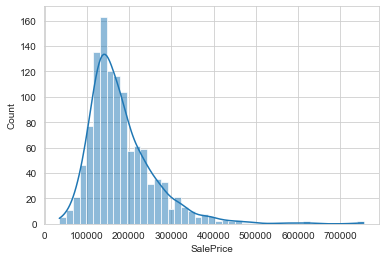

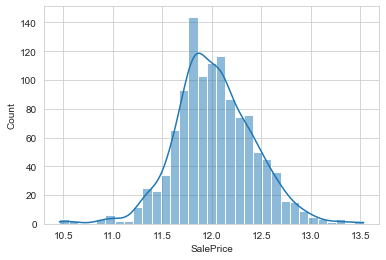

In [24]:
sns.set_style('whitegrid')

sns.histplot(df['SalePrice'], kde=True)
plt.show()


sns.histplot(np.log(df['SalePrice']), kde=True)
plt.show()

# corelation

<AxesSubplot:>

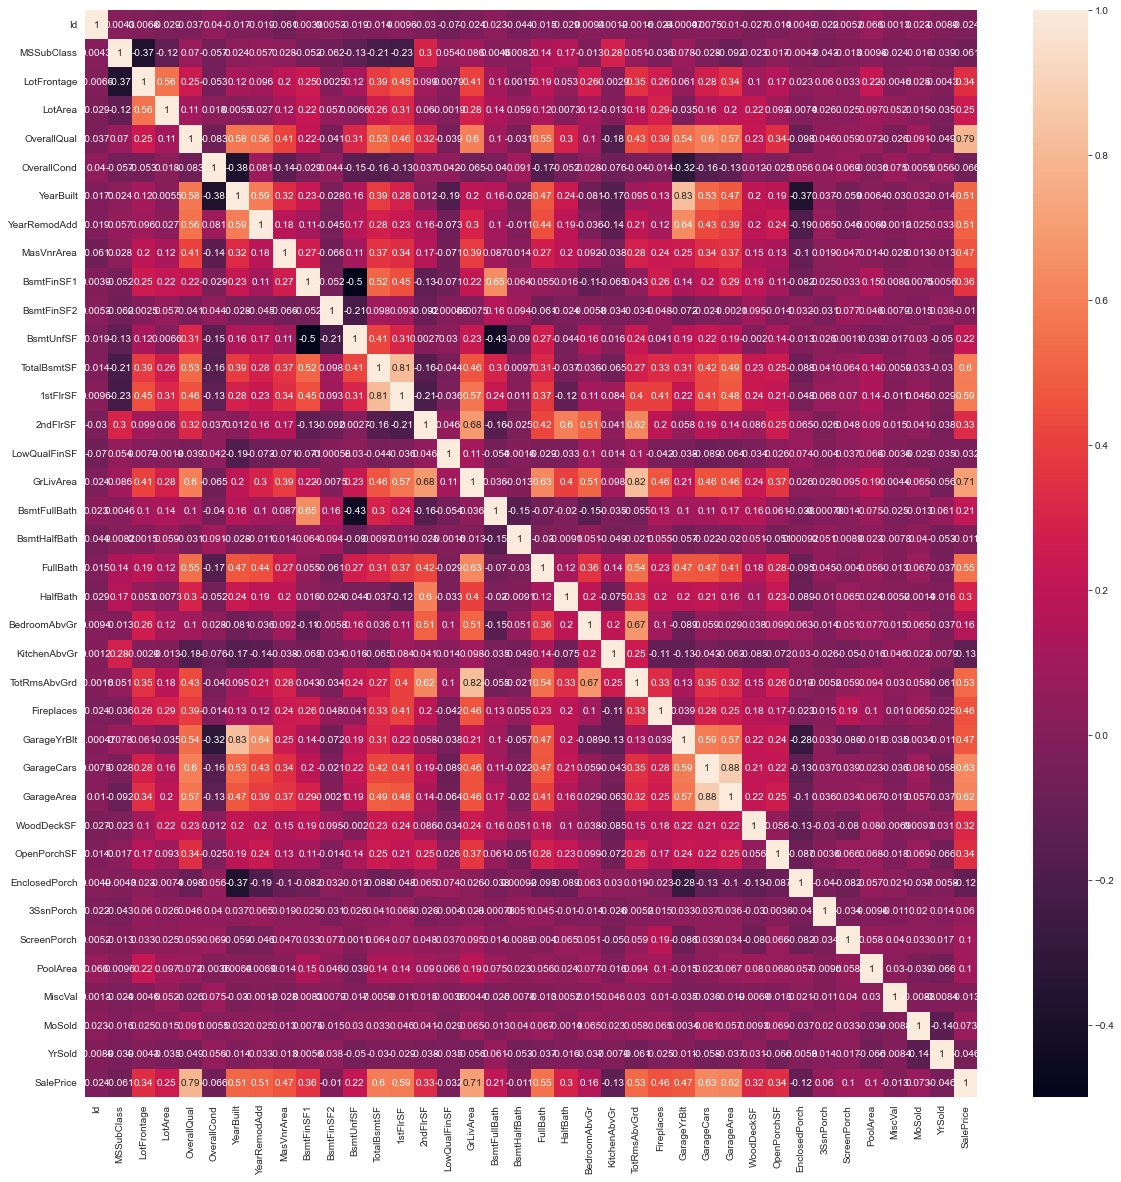

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

observations:
1.few features are strongly correlated with target feature
2. Although, few independent features are good correlated with each other

# MSSubClass

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

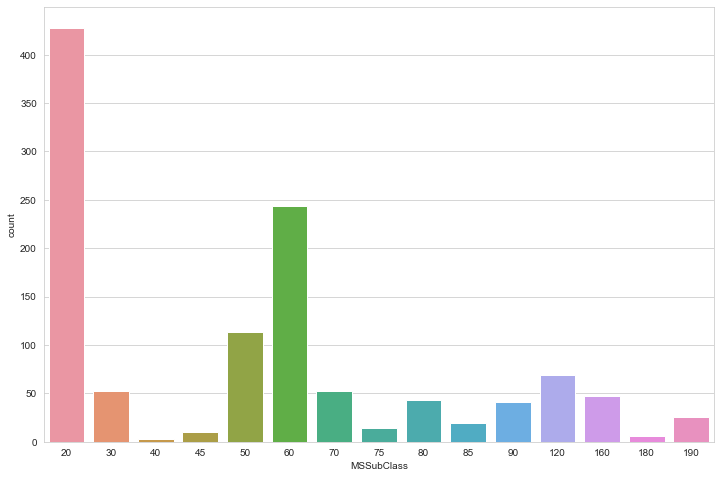

In [26]:
plt.figure(figsize=(12,8))
sns.countplot(df['MSSubClass'])

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

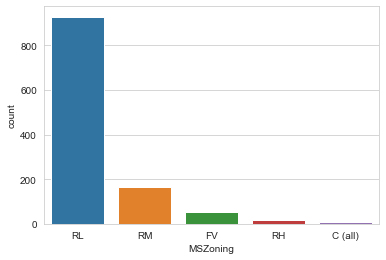

In [27]:
#MSZoning
sns.countplot(df['MSZoning'])


Residential Low Density Zone house more in this dataset.


# LotFrontage


<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

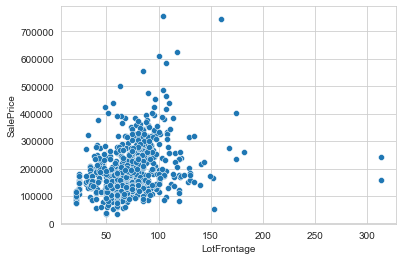

In [28]:
sns.scatterplot(df['LotFrontage'],df['SalePrice'])

LotFrontage have a linear positive relationship with SalePrice

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

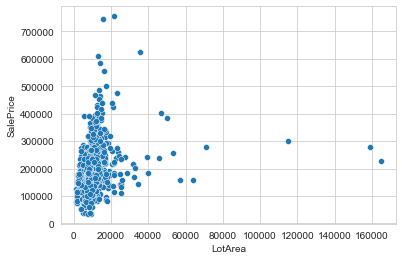

In [29]:

sns.scatterplot(df['LotArea'],df['SalePrice'])


LotArea have a kind of positive liner relationship with SalePrice with some outliers.



In [30]:
def feature_details(i):
    print(i,' has total unique values = ',df[i].nunique() ,'out of ',df.shape[0])
    if df[i].nunique() <10:
        print(df[i].unique())
    print('Feature datatype is = ',df[i].dtypes)
    print('Feature has ',(df[i].isnull().sum()/df.shape[0])*100,'%  missing values')
    
    if df[i].dtypes =='O':
        sns.countplot(df[i])
        plt.show()
        print(df.groupby(i)['SalePrice'].mean().sort_values(ascending=False))
    elif df[i].dtypes !='O':
        sns.scatterplot(df[i],df['SalePrice'])
        plt.show()
        
    

Street  has total unique values =  2 out of  1168
['Pave' 'Grvl']
Feature datatype is =  object
Feature has  0.0 %  missing values


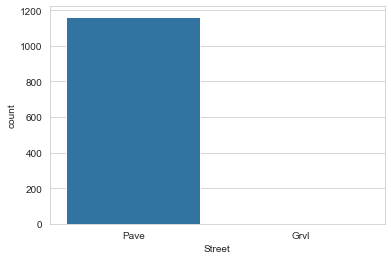

Street
Pave    181684.450172
Grvl    121110.750000
Name: SalePrice, dtype: float64


In [31]:
feature_details('Street')

LotShape  has total unique values =  4 out of  1168
['IR1' 'Reg' 'IR2' 'IR3']
Feature datatype is =  object
Feature has  0.0 %  missing values


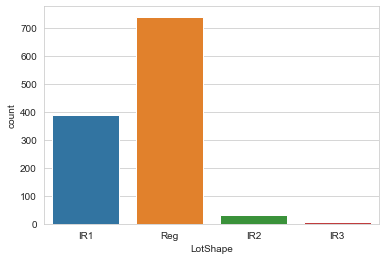

LotShape
IR2    233827.750000
IR3    226120.833333
IR1    206038.464103
Reg    165906.660811
Name: SalePrice, dtype: float64


In [32]:
feature_details('LotShape')

LandContour  has total unique values =  4 out of  1168
['Lvl' 'Bnk' 'HLS' 'Low']
Feature datatype is =  object
Feature has  0.0 %  missing values


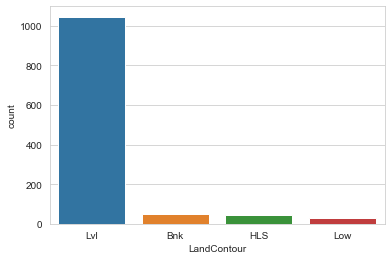

LandContour
HLS    214302.166667
Low    194393.333333
Lvl    181476.572658
Bnk    146163.140000
Name: SalePrice, dtype: float64


In [33]:
feature_details('LandContour')

In [34]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,6,2009,WD,Normal,215000


LotConfig  has total unique values =  5 out of  1168
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Feature datatype is =  object
Feature has  0.0 %  missing values


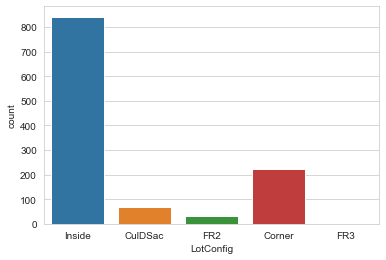

LotConfig
CulDSac    224594.463768
FR3        221500.000000
Corner     182427.635135
Inside     178003.105701
FR2        171138.636364
Name: SalePrice, dtype: float64


In [35]:
feature_details('LotConfig')

LandSlope  has total unique values =  3 out of  1168
['Gtl' 'Mod' 'Sev']
Feature datatype is =  object
Feature has  0.0 %  missing values


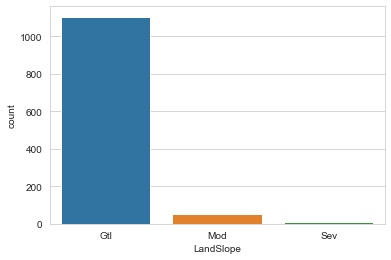

LandSlope
Sev    190160.833333
Mod    185353.313725
Gtl    181203.795475
Name: SalePrice, dtype: float64


In [36]:
feature_details('LandSlope')

Neighborhood  has total unique values =  25 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


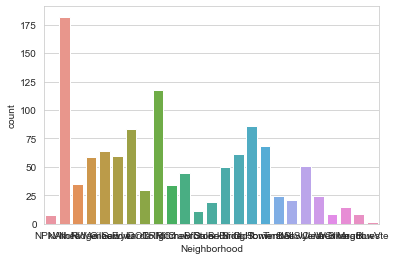

Neighborhood
NoRidge    341260.228571
NridgHt    312548.655738
StoneBr    301145.736842
Veenker    246833.333333
Timber     240579.291667
Somerst    222649.588235
ClearCr    216120.833333
Crawfor    208474.688889
CollgCr    199517.508475
Blmngtn    195987.000000
Gilbert    194790.093750
NWAmes     191643.305085
SawyerW    186909.647059
Mitchel    154654.411765
NAmes      146511.225275
SWISU      142587.333333
NPkVill    141968.750000
Blueste    137500.000000
Sawyer     135029.866667
OldTown    133947.197674
Edwards    128544.216867
BrkSide    122836.000000
BrDale     104081.818182
IDOTRR     101322.666667
MeadowV     88444.444444
Name: SalePrice, dtype: float64


In [37]:
feature_details('Neighborhood')

Condition1  has total unique values =  9 out of  1168
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Feature datatype is =  object
Feature has  0.0 %  missing values


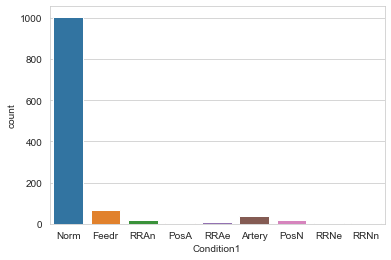

Condition1
RRNn      238000.000000
PosA      237833.333333
PosN      219264.705882
RRNe      190750.000000
RRAn      190074.850000
Norm      184692.003980
Feedr     142799.731343
RRAe      139044.444444
Artery    137926.315789
Name: SalePrice, dtype: float64


In [38]:
feature_details('Condition1')


Condition2  has total unique values =  8 out of  1168
['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
Feature datatype is =  object
Feature has  0.0 %  missing values


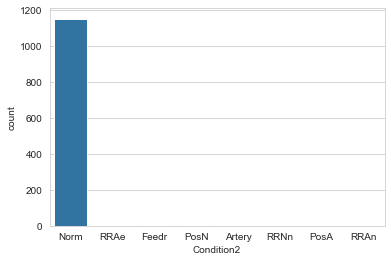

Condition2
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
Norm      181697.129983
RRAn      136905.000000
RRNn      125000.000000
Feedr     121166.666667
Artery    106500.000000
Name: SalePrice, dtype: float64


In [39]:
feature_details('Condition2')


BldgType  has total unique values =  5 out of  1168
['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
Feature datatype is =  object
Feature has  0.0 %  missing values


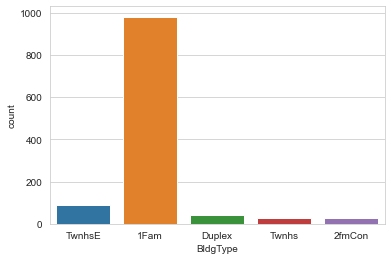

BldgType
TwnhsE    186066.111111
1Fam      185602.300714
Twnhs     139437.931034
Duplex    133871.609756
2fmCon    133737.037037
Name: SalePrice, dtype: float64


In [40]:
feature_details('BldgType')


HouseStyle  has total unique values =  8 out of  1168
['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
Feature datatype is =  object
Feature has  0.0 %  missing values


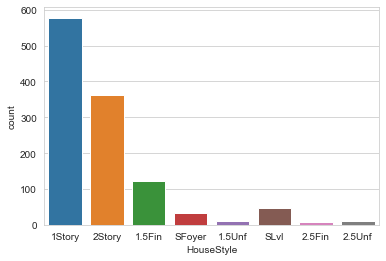

HouseStyle
2.5Fin    223285.714286
2Story    212193.515235
1Story    175940.826990
SLvl      170140.851064
2.5Unf    158690.000000
1.5Fin    138546.363636
SFoyer    137508.000000
1.5Unf    113216.666667
Name: SalePrice, dtype: float64


In [41]:
feature_details('HouseStyle')


OverallQual  has total unique values =  10 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


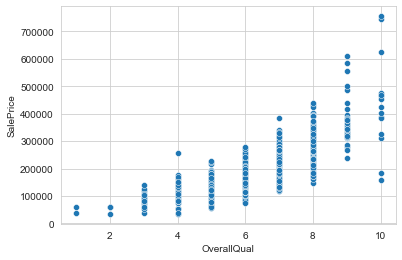

In [42]:
feature_details('OverallQual')


OverallCond  has total unique values =  9 out of  1168
[5 6 7 4 8 2 3 9 1]
Feature datatype is =  int64
Feature has  0.0 %  missing values


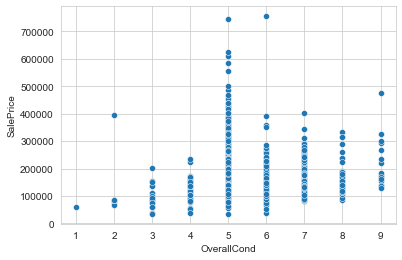

In [43]:
feature_details('OverallCond')


HouseStyle  has total unique values =  8 out of  1168
['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
Feature datatype is =  object
Feature has  0.0 %  missing values


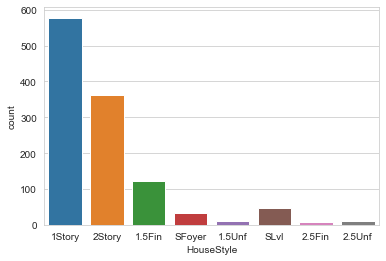

HouseStyle
2.5Fin    223285.714286
2Story    212193.515235
1Story    175940.826990
SLvl      170140.851064
2.5Unf    158690.000000
1.5Fin    138546.363636
SFoyer    137508.000000
1.5Unf    113216.666667
Name: SalePrice, dtype: float64


In [44]:
feature_details('HouseStyle')

OverallQual  has total unique values =  10 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


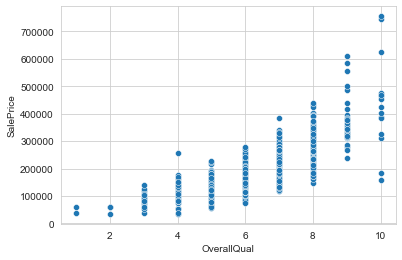

In [45]:
feature_details('OverallQual')

OverallQual  has total unique values =  10 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


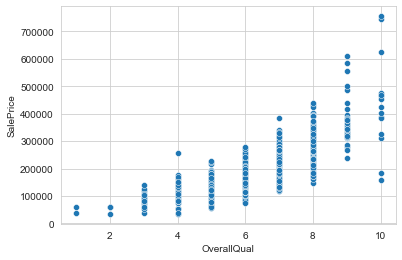

In [46]:
feature_details('OverallQual')

YearBuilt  has total unique values =  110 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


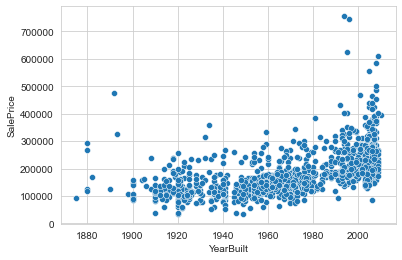

In [47]:
feature_details('YearBuilt')


YearRemodAdd  has total unique values =  61 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


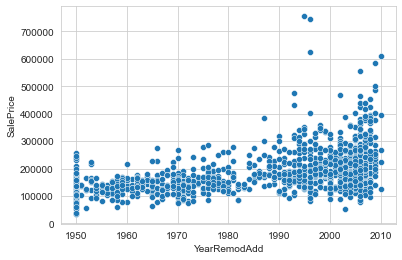

In [48]:
feature_details('YearRemodAdd')


RoofStyle  has total unique values =  6 out of  1168
['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
Feature datatype is =  object
Feature has  0.0 %  missing values


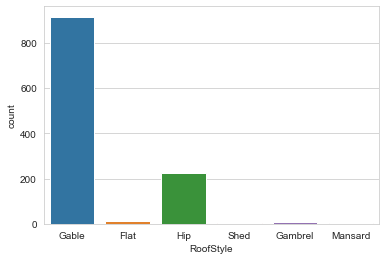

RoofStyle
Shed       225000.000000
Hip        214493.364444
Flat       204080.833333
Mansard    194795.800000
Gable      173251.570492
Gambrel    145111.111111
Name: SalePrice, dtype: float64


In [49]:
feature_details('RoofStyle')


RoofMatl  has total unique values =  8 out of  1168
['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 'ClyTile' 'Metal'
 'Membran']
Feature datatype is =  object
Feature has  0.0 %  missing values


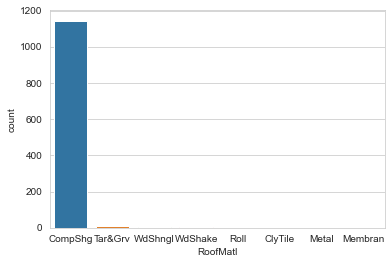

RoofMatl
WdShngl    390250.000000
WdShake    254250.000000
Membran    241500.000000
Tar&Grv    195747.000000
CompShg    180009.329545
Metal      180000.000000
ClyTile    160000.000000
Roll       137000.000000
Name: SalePrice, dtype: float64


In [50]:
feature_details('RoofMatl')


Exterior1st  has total unique values =  14 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


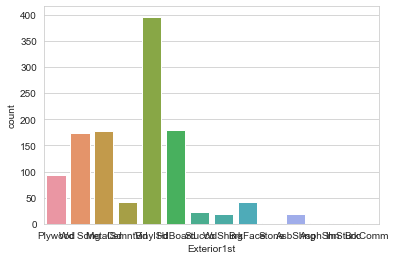

Exterior1st
ImStucc    262000.000000
Stone      258500.000000
CemntBd    242928.476190
VinylSd    215359.676768
BrkFace    198391.463415
Plywood    178890.075269
HdBoard    163432.648045
Stucco     160602.272727
WdShing    155481.578947
Wd Sdng    152572.724138
MetalSd    148498.196629
AsbShng    107774.263158
AsphShn    100000.000000
BrkComm     60000.000000
Name: SalePrice, dtype: float64


In [51]:
feature_details('Exterior1st')


Exterior2nd  has total unique values =  15 out of  1168
Feature datatype is =  object
Feature has  0.0 %  missing values


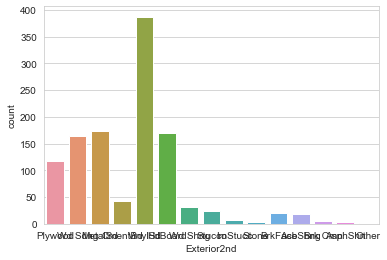

Exterior2nd
Other      319000.000000
ImStucc    273712.500000
CmentBd    247940.380952
VinylSd    215607.100775
BrkFace    194772.500000
Stone      174406.000000
Plywood    169979.042373
HdBoard    168398.200000
Wd Shng    156650.000000
Stucco     153066.695652
Wd Sdng    152218.969697
MetalSd    148570.398844
AsphShn    138000.000000
Brk Cmn    131300.000000
AsbShng    114372.833333
Name: SalePrice, dtype: float64


In [52]:
feature_details('Exterior2nd')


MasVnrType  has total unique values =  4 out of  1168
['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
Feature datatype is =  object
Feature has  0.5993150684931506 %  missing values


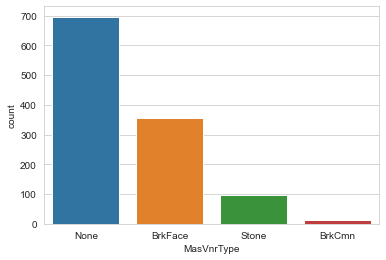

MasVnrType
Stone      261417.867347
BrkFace    205275.432203
None       158226.787356
BrkCmn     141990.076923
Name: SalePrice, dtype: float64


In [53]:
feature_details('MasVnrType')


MasVnrArea  has total unique values =  283 out of  1168
Feature datatype is =  float64
Feature has  0.5993150684931506 %  missing values


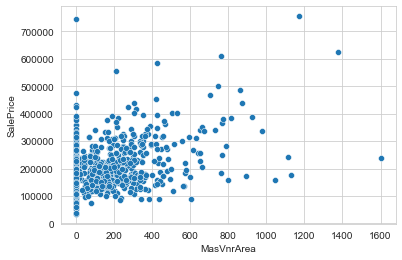

In [54]:
feature_details('MasVnrArea')


ExterQual  has total unique values =  4 out of  1168
['TA' 'Gd' 'Ex' 'Fa']
Feature datatype is =  object
Feature has  0.0 %  missing values


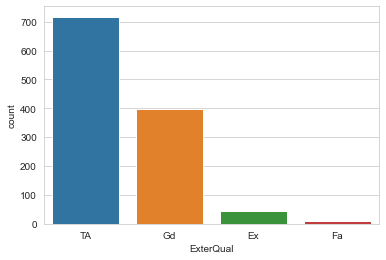

ExterQual
Ex    357817.651163
Gd    231009.743073
TA    144918.163180
Fa     87435.727273
Name: SalePrice, dtype: float64


In [55]:
feature_details('ExterQual')


ExterCond  has total unique values =  5 out of  1168
['TA' 'Gd' 'Fa' 'Po' 'Ex']
Feature datatype is =  object
Feature has  0.0 %  missing values


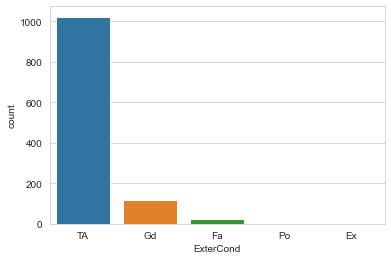

ExterCond
Ex    243000.000000
TA    184551.990215
Gd    171391.837607
Fa    105294.769231
Po     76500.000000
Name: SalePrice, dtype: float64


In [56]:
feature_details('ExterCond')


Foundation  has total unique values =  6 out of  1168
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
Feature datatype is =  object
Feature has  0.0 %  missing values


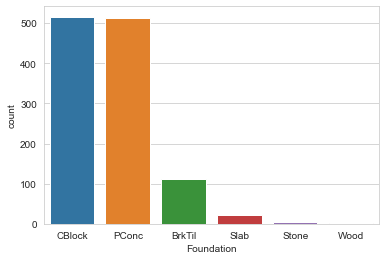

Foundation
PConc     225757.504873
Stone     177651.000000
Wood      164000.000000
CBlock    149858.994186
BrkTil    137895.285714
Slab      110846.428571
Name: SalePrice, dtype: float64


In [57]:
feature_details('Foundation')


# Basement


BsmtQual  has total unique values =  4 out of  1168
['Gd' 'TA' 'Ex' nan 'Fa']
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


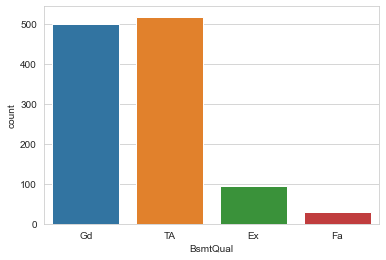

BsmtQual
Ex    331469.978723
Gd    203225.445783
TA    140898.736944
Fa    121349.000000
Name: SalePrice, dtype: float64


In [58]:
feature_details('BsmtQual')



BsmtCond  has total unique values =  4 out of  1168
['TA' 'Gd' 'Fa' nan 'Po']
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


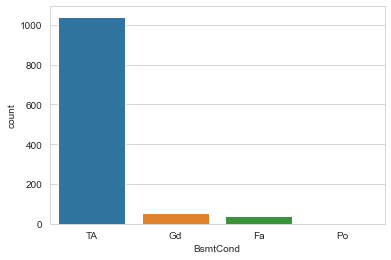

BsmtCond
Gd    219908.107143
TA    184018.669549
Fa    121075.102564
Po     64000.000000
Name: SalePrice, dtype: float64


In [59]:
feature_details('BsmtCond')


BsmtExposure  has total unique values =  4 out of  1168
['No' 'Gd' 'Av' 'Mn' nan]
Feature datatype is =  object
Feature has  2.654109589041096 %  missing values


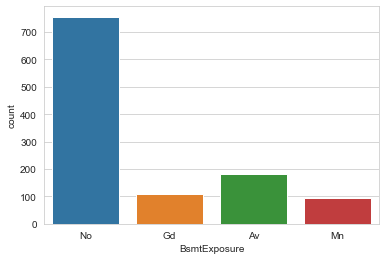

BsmtExposure
Gd    250581.138889
Av    204174.861111
Mn    194213.838710
No    167539.144180
Name: SalePrice, dtype: float64


In [60]:
feature_details('BsmtExposure')


BsmtFinType1  has total unique values =  6 out of  1168
['ALQ' 'GLQ' 'BLQ' 'Unf' 'Rec' 'LwQ' nan]
Feature datatype is =  object
Feature has  2.5684931506849313 %  missing values


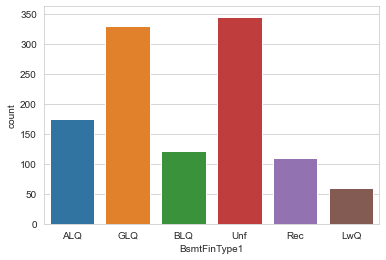

BsmtFinType1
GLQ    236871.596970
Unf    172159.521739
ALQ    161003.879310
BLQ    152803.396694
LwQ    152712.711864
Rec    143592.844037
Name: SalePrice, dtype: float64


In [61]:
feature_details('BsmtFinType1')


BsmtFinType2  has total unique values =  6 out of  1168
['Unf' 'Rec' 'BLQ' 'GLQ' nan 'ALQ' 'LwQ']
Feature datatype is =  object
Feature has  2.654109589041096 %  missing values


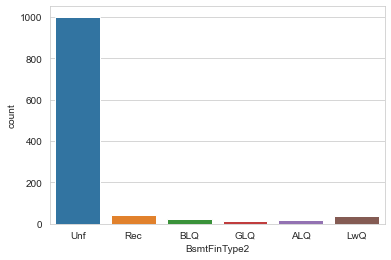

BsmtFinType2
GLQ    194937.500000
ALQ    194712.500000
Unf    185077.455090
LwQ    168846.250000
Rec    164477.325581
BLQ    154815.958333
Name: SalePrice, dtype: float64


In [62]:
feature_details('BsmtFinType2')


BsmtFinSF2  has total unique values =  122 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


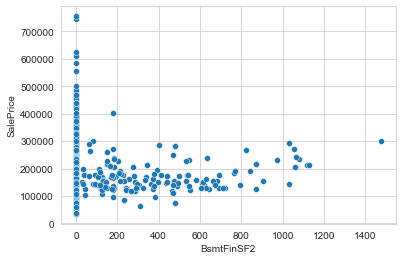

In [63]:
feature_details('BsmtFinSF2')


BsmtUnfSF  has total unique values =  681 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


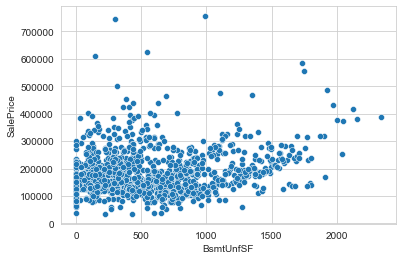

In [64]:
feature_details('BsmtUnfSF')


TotalBsmtSF  has total unique values =  636 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


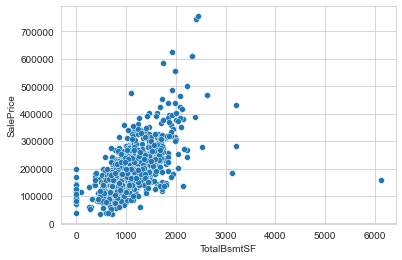

In [65]:
feature_details('TotalBsmtSF')


# Atmosphere


# Heating


Heating  has total unique values =  6 out of  1168
['GasA' 'GasW' 'Floor' 'OthW' 'Wall' 'Grav']
Feature datatype is =  object
Feature has  0.0 %  missing values


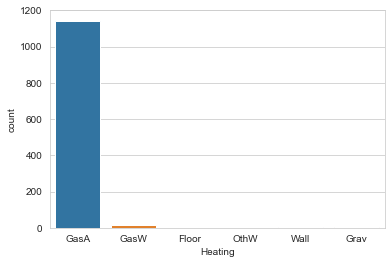

Heating
GasA     182591.394576
GasW     167312.785714
OthW     129500.000000
Wall      92100.000000
Floor     72500.000000
Grav      70080.000000
Name: SalePrice, dtype: float64


In [66]:
feature_details('Heating')


HeatingQC  has total unique values =  5 out of  1168
['TA' 'Ex' 'Gd' 'Fa' 'Po']
Feature datatype is =  object
Feature has  0.0 %  missing values


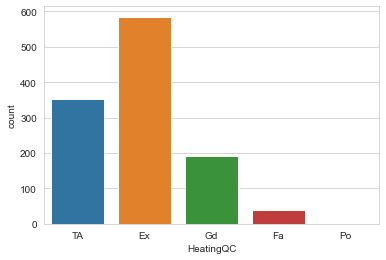

HeatingQC
Ex    215954.223932
Gd    158909.833333
TA    142684.883523
Fa    126556.710526
Po     87000.000000
Name: SalePrice, dtype: float64


In [67]:
feature_details('HeatingQC')


CentralAir  has total unique values =  2 out of  1168
['Y' 'N']
Feature datatype is =  object
Feature has  0.0 %  missing values


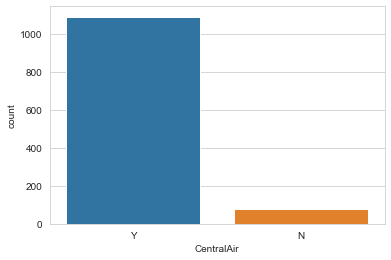

CentralAir
Y    186696.381651
N    108539.576923
Name: SalePrice, dtype: float64


In [68]:
feature_details('CentralAir')


Electrical  has total unique values =  5 out of  1168
['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix']
Feature datatype is =  object
Feature has  0.0 %  missing values


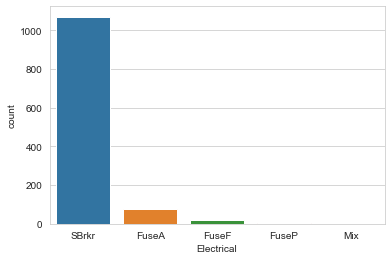

Electrical
SBrkr    187253.339252
FuseA    121840.986486
FuseF    109611.285714
FuseP    109500.000000
Mix       67000.000000
Name: SalePrice, dtype: float64


In [69]:
feature_details('Electrical')


1stFlrSF  has total unique values =  669 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


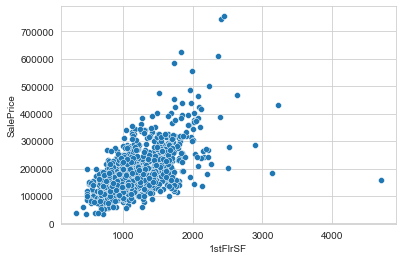

In [70]:
feature_details('1stFlrSF')


2ndFlrSF  has total unique values =  351 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


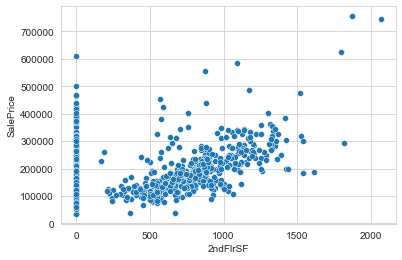

In [71]:
feature_details('2ndFlrSF')


LowQualFinSF  has total unique values =  21 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


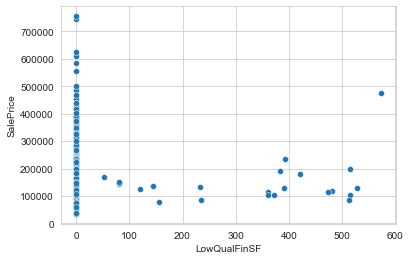

In [72]:
feature_details('LowQualFinSF')


GrLivArea  has total unique values =  746 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


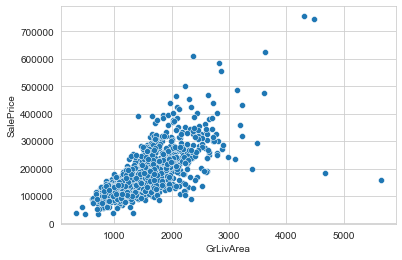

In [73]:
feature_details('GrLivArea')


BsmtFullBath  has total unique values =  4 out of  1168
[0 1 2 3]
Feature datatype is =  int64
Feature has  0.0 %  missing values


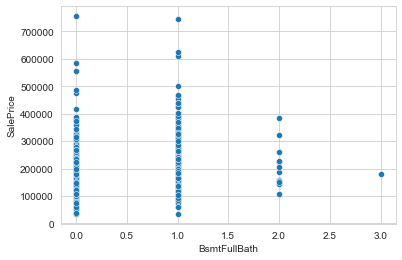

In [74]:
feature_details('BsmtFullBath')


BsmtHalfBath  has total unique values =  3 out of  1168
[0 1 2]
Feature datatype is =  int64
Feature has  0.0 %  missing values


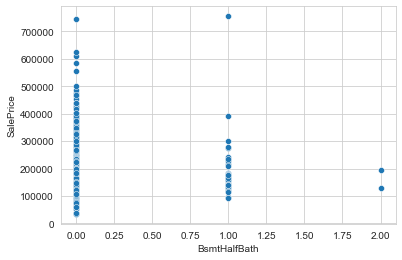

In [75]:
feature_details('BsmtHalfBath')


FullBath  has total unique values =  4 out of  1168
[2 1 3 0]
Feature datatype is =  int64
Feature has  0.0 %  missing values


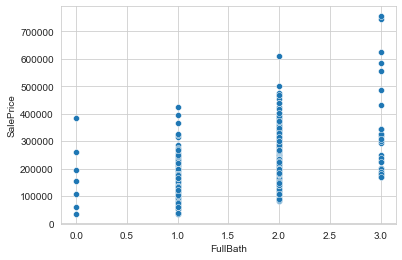

In [76]:
feature_details('FullBath')


HalfBath  has total unique values =  3 out of  1168
[0 1 2]
Feature datatype is =  int64
Feature has  0.0 %  missing values


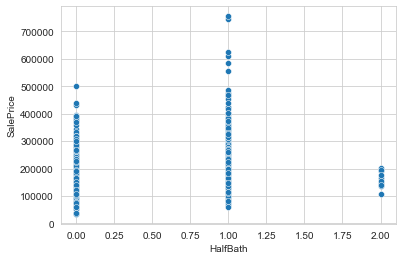

In [77]:
feature_details('HalfBath')


# Bedroom


BedroomAbvGr  has total unique values =  8 out of  1168
[2 4 3 1 5 0 6 8]
Feature datatype is =  int64
Feature has  0.0 %  missing values


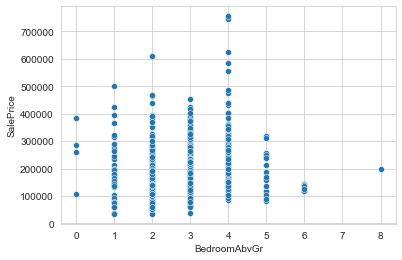

In [78]:
feature_details('BedroomAbvGr')


KitchenAbvGr  has total unique values =  4 out of  1168
[1 2 3 0]
Feature datatype is =  int64
Feature has  0.0 %  missing values


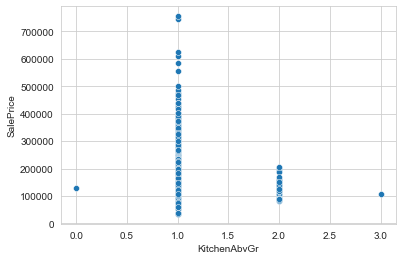

In [79]:
feature_details('KitchenAbvGr')


KitchenQual  has total unique values =  4 out of  1168
['TA' 'Gd' 'Ex' 'Fa']
Feature datatype is =  object
Feature has  0.0 %  missing values


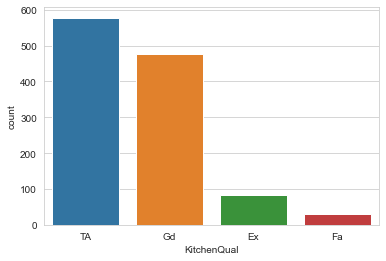

KitchenQual
Ex    327812.329268
Gd    211076.234310
TA    140206.313149
Fa    105028.100000
Name: SalePrice, dtype: float64


In [80]:
feature_details('KitchenQual')


In [81]:
df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

TotRmsAbvGrd  has total unique values =  12 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


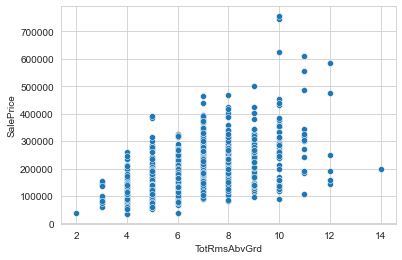

In [82]:
feature_details('TotRmsAbvGrd')


Functional  has total unique values =  7 out of  1168
['Typ' 'Mod' 'Maj1' 'Min1' 'Min2' 'Sev' 'Maj2']
Feature datatype is =  object
Feature has  0.0 %  missing values


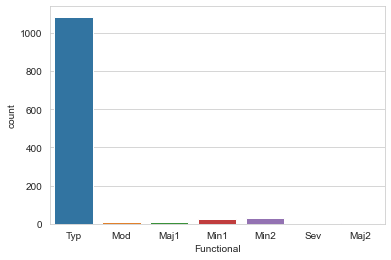

Functional
Typ     184204.948387
Min1    152630.000000
Maj1    151443.090909
Min2    146841.666667
Mod     145241.666667
Sev     129000.000000
Maj2     86000.000000
Name: SalePrice, dtype: float64


In [83]:
feature_details('Functional')


Fireplaces  has total unique values =  4 out of  1168
[1 0 2 3]
Feature datatype is =  int64
Feature has  0.0 %  missing values


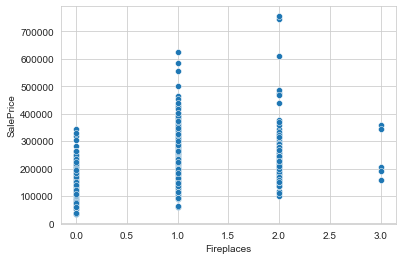

In [84]:
feature_details('Fireplaces')


GarageType  has total unique values =  6 out of  1168
['Attchd' 'BuiltIn' 'Detchd' 'Basment' nan '2Types' 'CarPort']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


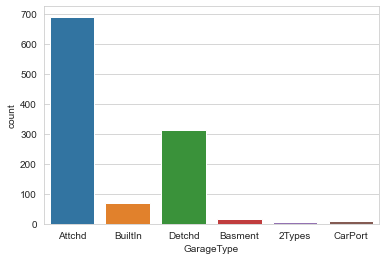

GarageType
BuiltIn    254970.900000
Attchd     203675.839363
Basment    160708.937500
2Types     144200.000000
Detchd     135873.799363
CarPort    109957.375000
Name: SalePrice, dtype: float64


In [85]:
feature_details('GarageType')


GarageYrBlt  has total unique values =  97 out of  1168
Feature datatype is =  float64
Feature has  5.47945205479452 %  missing values


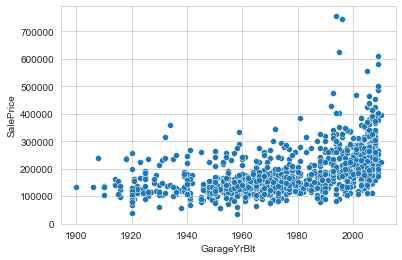

In [86]:
feature_details('GarageYrBlt')


GarageFinish  has total unique values =  3 out of  1168
['RFn' 'Unf' 'Fin' nan]
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


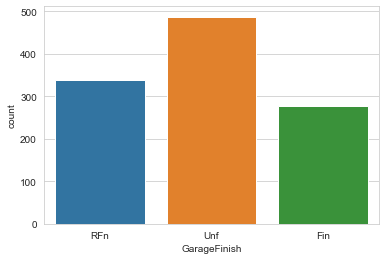

GarageFinish
Fin    241223.809353
RFn    201925.554572
Unf    143555.156057
Name: SalePrice, dtype: float64


In [87]:
feature_details('GarageFinish')


GarageCars  has total unique values =  5 out of  1168
[2 3 1 0 4]
Feature datatype is =  int64
Feature has  0.0 %  missing values


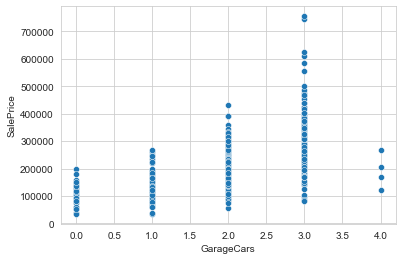

In [88]:
feature_details('GarageCars')


GarageArea  has total unique values =  392 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


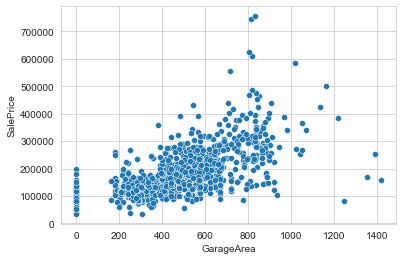

In [89]:
feature_details('GarageArea')


GarageQual  has total unique values =  5 out of  1168
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


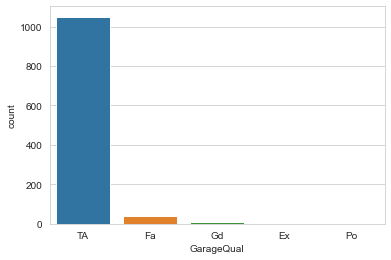

GarageQual
Ex    297750.000000
Gd    219822.727273
TA    187753.449524
Fa    129889.000000
Po    102000.000000
Name: SalePrice, dtype: float64


In [90]:
feature_details('GarageQual')


GarageCond  has total unique values =  5 out of  1168
['TA' 'Fa' 'Gd' nan 'Po' 'Ex']
Feature datatype is =  object
Feature has  5.47945205479452 %  missing values


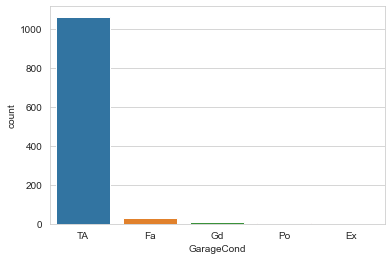

GarageCond
TA    188483.112158
Gd    179921.250000
Ex    120500.000000
Fa    115031.821429
Po    110500.000000
Name: SalePrice, dtype: float64


In [91]:
feature_details('GarageCond')


PavedDrive  has total unique values =  3 out of  1168
['Y' 'N' 'P']
Feature datatype is =  object
Feature has  0.0 %  missing values


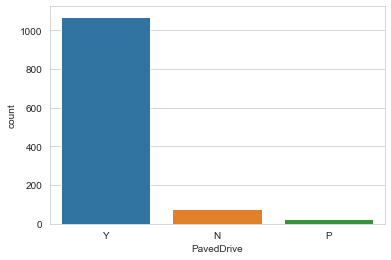

PavedDrive
Y    187006.026144
P    133326.086957
N    116421.472973
Name: SalePrice, dtype: float64


In [92]:
feature_details('PavedDrive')


WoodDeckSF  has total unique values =  244 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


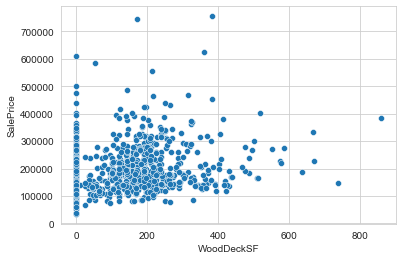

In [93]:
feature_details('WoodDeckSF')


OpenPorchSF  has total unique values =  176 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


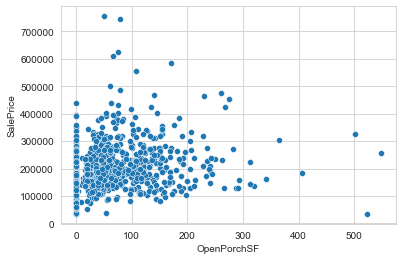

In [94]:
feature_details('OpenPorchSF')


EnclosedPorch  has total unique values =  106 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


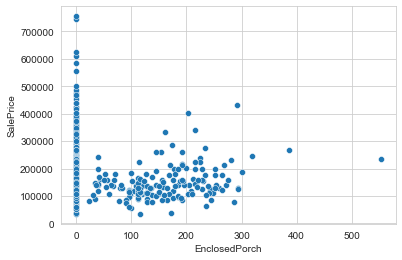

In [95]:
feature_details('EnclosedPorch')


3SsnPorch  has total unique values =  18 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


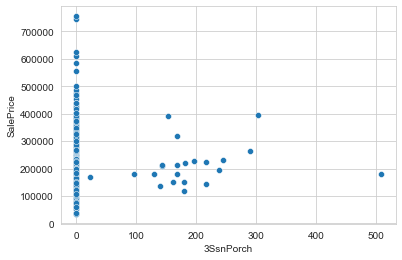

In [96]:
feature_details('3SsnPorch')


ScreenPorch  has total unique values =  65 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


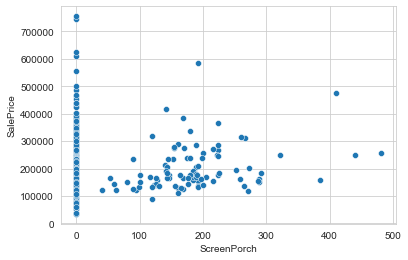

In [97]:
feature_details('ScreenPorch')


PoolArea  has total unique values =  8 out of  1168
[  0 555 576 738 519 480 648 512]
Feature datatype is =  int64
Feature has  0.0 %  missing values


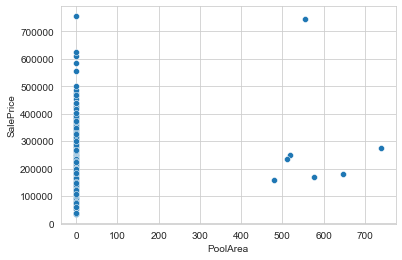

In [98]:
feature_details('PoolArea')


MiscVal  has total unique values =  20 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


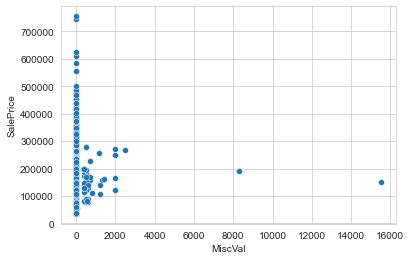

In [99]:
feature_details('MiscVal')


MoSold  has total unique values =  12 out of  1168
Feature datatype is =  int64
Feature has  0.0 %  missing values


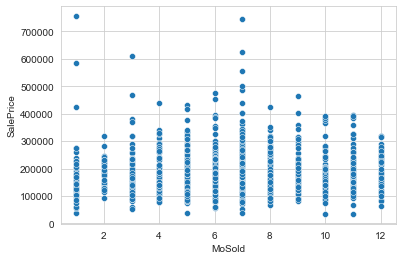

In [100]:
feature_details('MoSold')


YrSold  has total unique values =  5 out of  1168
[2007 2010 2009 2006 2008]
Feature datatype is =  int64
Feature has  0.0 %  missing values


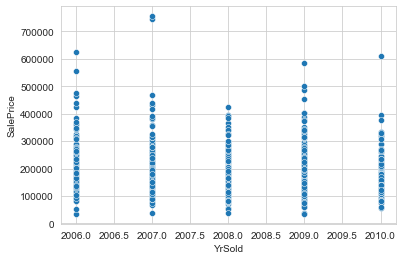

In [101]:
feature_details('YrSold')


SaleType  has total unique values =  9 out of  1168
['WD' 'COD' 'New' 'ConLI' 'ConLw' 'Con' 'ConLD' 'Oth' 'CWD']
Feature datatype is =  object
Feature has  0.0 %  missing values


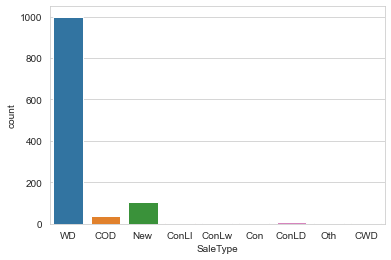

SaleType
New      271104.500000
Con      269600.000000
ConLI    200390.000000
WD       173668.456456
CWD      171166.666667
COD      146722.368421
ConLD    146141.000000
ConLw    143625.000000
Oth      119850.000000
Name: SalePrice, dtype: float64


In [102]:
feature_details('SaleType')


SaleCondition  has total unique values =  6 out of  1168
['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']
Feature datatype is =  object
Feature has  0.0 %  missing values


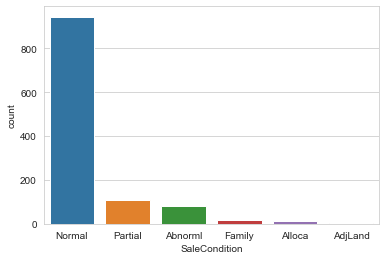

SaleCondition
Partial    269585.231481
Normal     175436.408466
Alloca     167377.416667
Family     149138.888889
Abnorml    147567.938272
AdjLand    104125.000000
Name: SalePrice, dtype: float64


In [103]:
feature_details('SaleCondition')



In [104]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,IR1,Lvl,AllPub,Inside,...,0,0,95,0,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,Reg,Lvl,AllPub,Corner,...,184,0,0,0,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,Reg,Lvl,AllPub,Inside,...,102,0,0,0,0,10,2008,COD,Abnorml,118500


In [105]:
# as 3 features are providing same information as 1 feature, lets drop those 3 features and have that 1 

df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis=1, inplace=True)

In [106]:
df.shape

(1168, 73)

In [107]:
continuous= [x for x in df.columns if df[x].dtypes!='O']
categorical= [x for x in df.columns if df[x].dtypes=='O']

In [108]:
len(continuous), len(categorical), df.shape[1]

(35, 38, 73)

# Fill Null Vlaues


In [109]:
# Continuous feature null values

cont_null=[x for x in continuous if df[x].isnull().sum()>0]

for i in cont_null:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [110]:
df[cont_null].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [111]:
df[continuous].isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [112]:
df[categorical].isnull().sum()


MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        7
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinType2     31
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
KitchenQual       0
Functional        0
GarageType       64
GarageFinish     64
GarageQual       64
GarageCond       64
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [113]:
cat_null=[x for x in categorical if df[x].isnull().sum()>0]

for i in cat_null:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [114]:
df[categorical].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

# checking outlier

In [115]:
outlier=['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','MoSold']


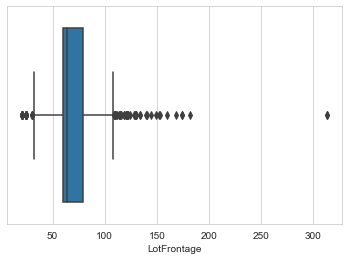

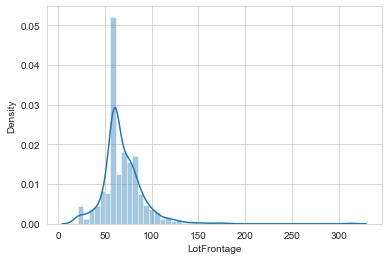

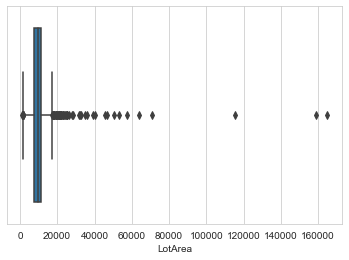

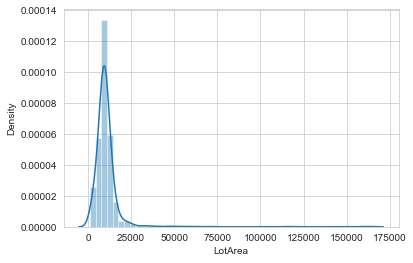

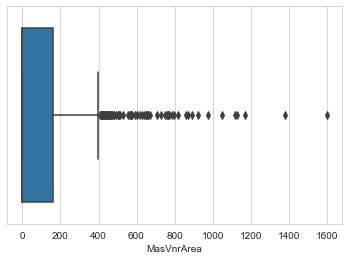

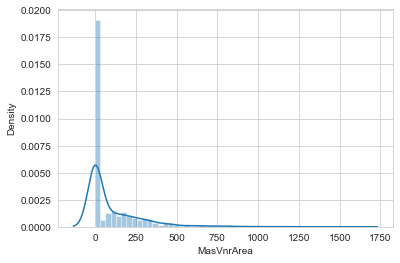

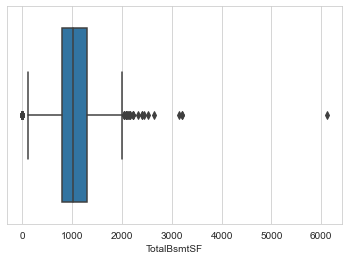

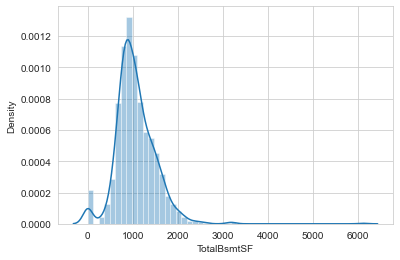

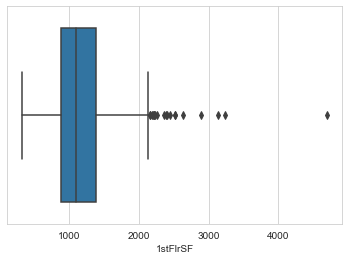

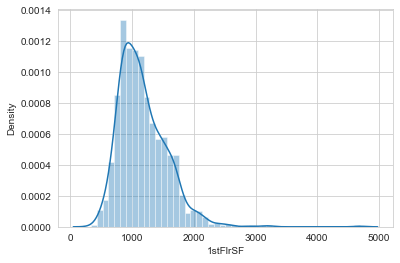

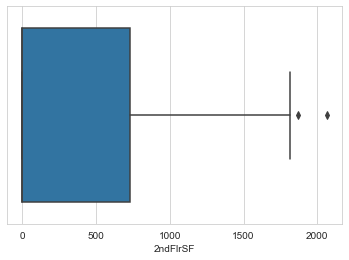

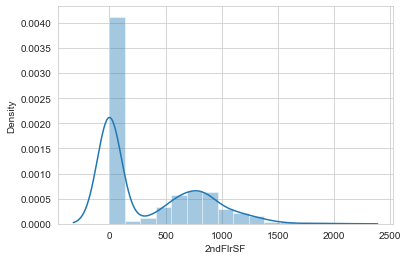

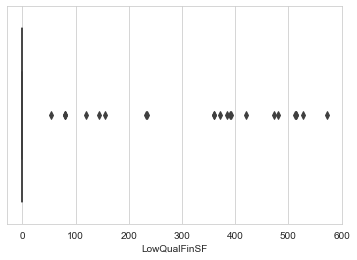

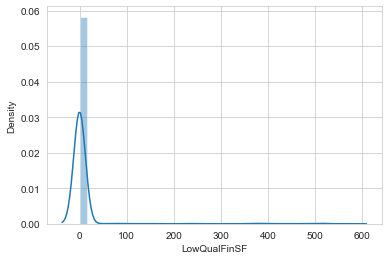

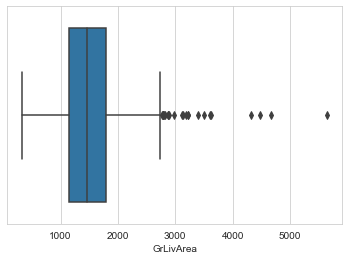

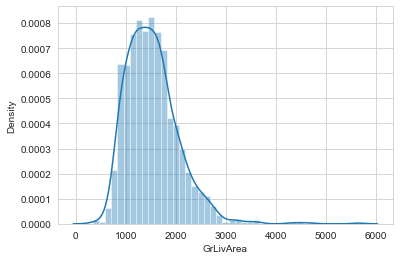

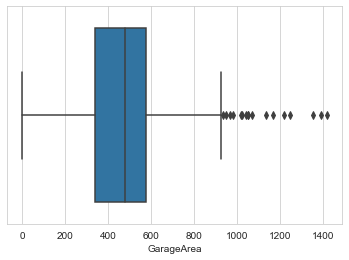

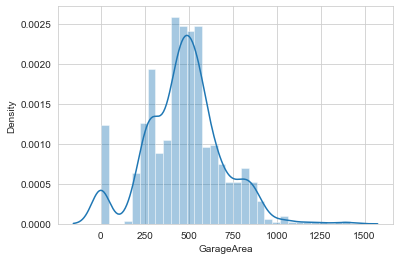

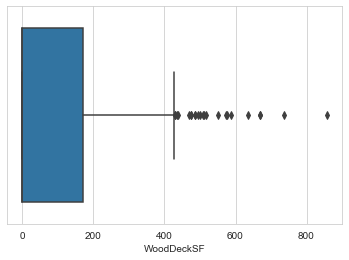

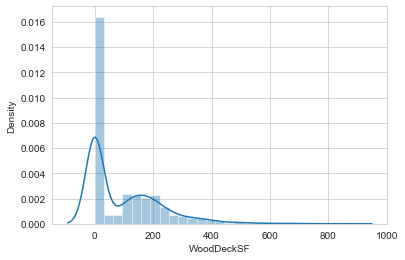

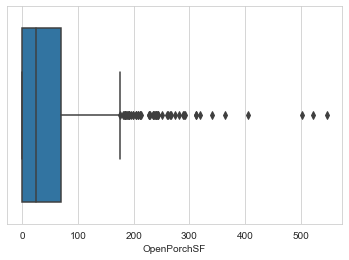

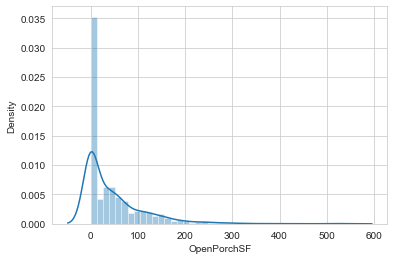

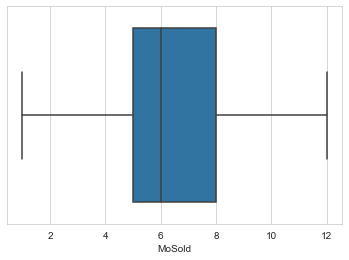

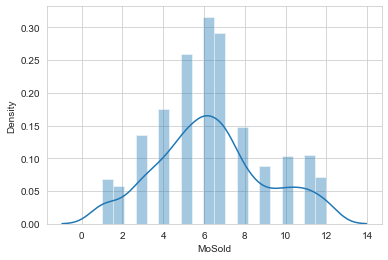

In [116]:
for i in outlier:
    sns.boxplot(df[i])
    plt.show()
    sns.distplot(df[i])
    plt.show()

# Outliers handle by IQR


In [117]:
for i in outlier:
    IQR= df[i].quantile(.75)-df[i].quantile(.25)
    lower=df[i].quantile(.25) - (1.5 * IQR)
    upper=df[i].quantile(.75) + (1.5 * IQR)
    df[i]=np.where(df[i]<lower,lower,df[i])
    df[i]=np.where(df[i]>upper,upper,df[i])

In [118]:
df.shape


(1168, 73)

In [119]:
continuous= [x for x in df.columns if df[x].dtypes!='O']
categorical= [x for x in df.columns if df[x].dtypes=='O']

In [120]:
df[continuous].shape , df[categorical].shape

((1168, 35), (1168, 38))

# Encoding


In [121]:
df[categorical].head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,COD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


Some of will be nominal and some will be ordinal in category, we have to encode accordingly



In [122]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print('*' * 50)

MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)']
**************************************************
Street
['Pave' 'Grvl']
**************************************************
LotShape
['IR1' 'Reg' 'IR2' 'IR3']
**************************************************
LandContour
['Lvl' 'Bnk' 'HLS' 'Low']
**************************************************
Utilities
['AllPub']
**************************************************
LotConfig
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
**************************************************
LandSlope
['Gtl' 'Mod' 'Sev']
**************************************************
Neighborhood
['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
**************************************************
Condition1
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
**************

In [123]:
ordinal_cols = {
    'ExterQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2},
    'ExterCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},
    'BsmtQual': {'Ex':5,'Gd':4,'TA':3,'Fa':2},
    'BsmtCond' : {'Gd':4,'TA':3,'Fa':2,'Po':1},
    'BsmtExposure' : {'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1},
    'BsmtFinType1' : {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1},
    'BsmtFinType2' : {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1},
    'HeatingQC' :{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1  },
    'KitchenQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageQual':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageCond':{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1 },
    'GarageFinish' : {'Fin':3,'RFn':2,'Unf':1},
    
      
    
    
    'Utilities' : {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}
}

In [124]:
df.replace(ordinal_cols, inplace = True)


In [125]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,60.0,4928.0,Pave,IR1,Lvl,4,Inside,...,0,0,0,0,0,2.0,2007,WD,Normal,128000
1,889,20,RL,95.0,15865.0,Pave,IR1,Lvl,4,Inside,...,0,0,224,0,0,10.0,2007,WD,Normal,268000
2,793,60,RL,92.0,9920.0,Pave,IR1,Lvl,4,CulDSac,...,0,0,0,0,0,6.0,2007,WD,Normal,269790
3,110,20,RL,105.0,11751.0,Pave,IR1,Lvl,4,Inside,...,0,0,0,0,0,1.0,2010,COD,Normal,190000
4,422,20,RL,60.0,16635.0,Pave,IR1,Lvl,4,FR2,...,0,0,0,0,0,6.0,2009,WD,Normal,215000


In [126]:
df.shape

(1168, 73)

In [127]:
encoded=pd.get_dummies(df)


In [128]:
encoded.shape


(1168, 223)

In [129]:
[x for x in encoded.columns if encoded[x].dtypes=='O']


[]

In [130]:
# Seprate input and output features

x= encoded.drop('SalePrice', axis=1)
y=encoded['SalePrice']

In [131]:
x.shape, y.shape


((1168, 222), (1168,))

In [132]:
x.head()


,Id,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,127,120,60.0,4928.0,4,6,5,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
1,889,20,95.0,15865.0,4,8,6,1970,1970,0.0,...,0,0,0,1,0,0,0,0,1,0
2,793,60,92.0,9920.0,4,7,5,1996,1997,0.0,...,0,0,0,1,0,0,0,0,1,0
3,110,20,105.0,11751.0,4,6,6,1977,1977,400.0,...,0,0,0,0,0,0,0,0,1,0
4,422,20,60.0,16635.0,4,6,7,1977,2000,126.0,...,0,0,0,1,0,0,0,0,1,0


In [133]:
x=x.drop(["Id"], axis=1)

In [134]:
x.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Utilities', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=221)

In [135]:
x.shape

(1168, 221)

In [136]:
y.shape

(1168,)

In [137]:
y.head()

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

# Feature Selection


In [138]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(x,y)

In [139]:
mutual_info=pd.Series(mutual_info)
mutual_info.index= x.columns

In [140]:
(mutual_info.sort_values(ascending=False)!=0).count()

221

In [141]:
pd.DataFrame(mutual_info).value_counts(ascending=False)


0.000000    51
0.036115     1
0.029969     1
0.030212     1
0.032232     1
0.032481     1
0.033630     1
0.034263     1
0.034913     1
0.034979     1
0.036522     1
0.059506     1
0.037698     1
0.037809     1
0.038110     1
0.044732     1
0.049276     1
0.049707     1
0.052425     1
0.056845     1
0.029744     1
0.028923     1
0.028527     1
0.027910     1
0.019675     1
0.019693     1
0.020376     1
0.020376     1
0.020861     1
0.021029     1
0.021411     1
0.022061     1
0.022783     1
0.023220     1
0.023819     1
0.024000     1
0.025986     1
0.026768     1
0.026915     1
0.027223     1
0.027736     1
0.058979     1
0.060609     1
0.019154     1
0.267890     1
0.165986     1
0.170296     1
0.196928     1
0.206679     1
0.227053     1
0.240365     1
0.252123     1
0.265960     1
0.281653     1
0.060691     1
0.328234     1
0.329781     1
0.342191     1
0.349455     1
0.363325     1
0.365452     1
0.366923     1
0.450471     1
0.162467     1
0.154863     1
0.149051     1
0.145994  

In [142]:
from sklearn.feature_selection import SelectPercentile


In [143]:
selected=SelectPercentile(mutual_info_regression,percentile=76)


In [144]:
selected.fit(x,y)


SelectPercentile(percentile=76,
                 score_func=<function mutual_info_regression at 0x000001CFC7520D30>)

In [145]:
selected.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True, False,  True, False, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True, False,  True,
        True,  True,

In [146]:
selectedfeatures=x.columns[selected.get_support()]


In [147]:
len(selectedfeatures)


167

In [148]:
# Here , we have selected only the features have some dependency on target feature.
inputdata=x[selectedfeatures]

In [149]:
inputdata.shape


(1168, 167)

In [150]:
#Lets remove skewness of some categorical features:
skew_feature=['LotFrontage','LotArea','TotalBsmtSF','1stFlrSF','GrLivArea']

In [151]:
for feature in skew_feature:
    inputdata[feature]= np.log(inputdata[feature])

In [152]:
inputdata.head()


,MSSubClass,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_Con,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
0,120,4.094345,8.502689,4,6,5,1976,1976,0.0,3,...,0,0,1,0,0,1,0,0,1,0
1,20,4.553877,9.671871,4,8,6,1970,1970,0.0,4,...,0,0,1,0,0,1,0,0,1,0
2,60,4.521789,9.202308,4,7,5,1996,1997,0.0,4,...,0,0,1,0,0,1,0,0,1,0
3,20,4.653960,9.371694,4,6,6,1977,1977,400.0,3,...,0,0,1,0,0,0,0,0,1,0
4,20,4.094345,9.719264,4,6,7,1977,2000,126.0,4,...,0,0,1,0,0,1,0,0,1,0


# Standardization


In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(inputdata)

In [154]:
x.shape

(1168, 221)

In [155]:
y.shape

(1168,)

# Machine Learning


In [156]:
# Its a Regression problem coz output variable have continuous data, sales prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [157]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=i,test_size=.20)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8737662288139121 on Random State = 24


In [ ]:
'[--;/;p000000;8089lloo 1011
-69++++++-7'.'.[]'
9m.ol8ik.ppoiugfjja              3
.l,klmnn/

In [158]:
x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=135,test_size=.3)
LR.fit(x_train,y_train)

LinearRegression()

In [159]:
bfrom sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [160]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()


In [161]:
model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [162]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 273879548496682.62
mean_square_error of LinearRegression() model 1.237809881912863e+31
R2 Score of LinearRegression() model -1.7457747407492526e+23
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 19762.319822769707
mean_square_error of Ridge() model 816860087.8922118
R2 Score of Ridge() model 88.47921858593769
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 20542.20599651688
mean_square_error of Lasso() model 904242399.2002687
R2 Score of Lasso() model 87.24680128099463
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 30051.524216524216
mean_square_error of DecisionTreeRegressor() model 2089478577.877493
R2 Score of DecisionTreeRegressor() model 70.53053965801199
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 61141.46913211341
mean_square_error of SVR

# Cross Validation

In [163]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)

Root mean_square of  LinearRegression() model 3518252239270037.0
cross Validation score of root mean square  LinearRegression()  is  4236683045084192.5
**************************************************
Root mean_square of  Ridge() model 28580.764298601458
cross Validation score of root mean square  Ridge()  is  32240.550988702365
**************************************************
Root mean_square of  Lasso() model 30070.623525299052
cross Validation score of root mean square  Lasso()  is  33837.04513176204
**************************************************
Root mean_square of  DecisionTreeRegressor() model 45710.81467090138
cross Validation score of root mean square  DecisionTreeRegressor()  is  45648.03239251007
**************************************************
Root mean_square of  SVR() model 85913.99675382952
cross Validation score of root mean square  SVR()  is  81100.86934769654
**************************************************
Root mean_square of  KNeighborsRegressor() model 4

# Hypertuning of XGBRegressor


In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.01, 0.05,0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [166]:
GCV= GridSearchCV(XGB_model,params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat...
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0,
                                    reg_alpha=0, reg_lambda=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 8],
                         'min_child_weight': [1, 3, 5, 7]},
             scoring='neg_mean_squared_error')

In [167]:
GCV.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.01,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 1}

In [168]:
GCV_pred=GCV.best_estimator_.predict(x_test)
np.sqrt(mean_squared_error(y_test,GCV_pred))

25190.985214510296

# Saving model in pickle format


In [169]:
import joblib
joblib.dump(GCV.best_estimator_,"house_price_prediction.pkl")

['house_price_prediction.pkl']

# Load Test Data


In [21]:
testdata= pd.read_csv('test.csv')

In [22]:
testdata.shape

(292, 80)

In [23]:
testdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [24]:
# Check Missing Values:
    
pd.set_option('display.max_rows',None)
(testdata.isnull().sum()/testdata.shape[0])*100

Id                 0.000000
MSSubClass         0.000000
MSZoning           0.000000
LotFrontage       15.410959
LotArea            0.000000
Street             0.000000
Alley             95.205479
LotShape           0.000000
LandContour        0.000000
Utilities          0.000000
LotConfig          0.000000
LandSlope          0.000000
Neighborhood       0.000000
Condition1         0.000000
Condition2         0.000000
BldgType           0.000000
HouseStyle         0.000000
OverallQual        0.000000
OverallCond        0.000000
YearBuilt          0.000000
YearRemodAdd       0.000000
RoofStyle          0.000000
RoofMatl           0.000000
Exterior1st        0.000000
Exterior2nd        0.000000
MasVnrType         0.342466
MasVnrArea         0.342466
ExterQual          0.000000
ExterCond          0.000000
Foundation         0.000000
BsmtQual           2.397260
BsmtCond           2.397260
BsmtExposure       2.397260
BsmtFinType1       2.397260
BsmtFinSF1         0.000000
BsmtFinType2       2

In [25]:
# we have removed these features in train data
testdata=testdata.drop(['Id','Alley','PoolQC','Fence','MiscFeature','FireplaceQu'], axis=1)

In [27]:
testdata.shape

(292, 74)

In [28]:
testdata.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Utilities'], axis=1, inplace=True)

# Fill Null values


In [29]:
# Continuous feature null values

cont_null=[x for x in testdata if testdata[x].isnull().sum()>0 and (testdata[x].dtypes!='O')]

for i in cont_null:
    testdata[i].fillna(testdata[i].mode()[0],inplace=True)

In [30]:
testdata[cont_null].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [32]:
cat_null=[x for x in testdata if testdata[x].isnull().sum()>0 and (testdata[x].dtypes=='O')]

for i in cat_null:
    testdata[i].fillna(testdata[i].mode()[0],inplace=True)

In [33]:
testdata[cat_null].isnull().sum()


MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [34]:
testdata.isnull().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt 

In [35]:
testdata['HouseAge']= testdata['YrSold']-testdata['YearBuilt']
testdata['ModificationAge']=testdata['YrSold']-testdata['YearRemodAdd']
testdata['GarageAge']=testdata['YrSold']-testdata['GarageYrBlt']

In [36]:
testdata.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'], axis=1, inplace=True)

In [37]:
testdata.shape

(292, 69)

In [39]:
outlier=['LotFrontage','LotArea','MasVnrArea','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','MoSold','HouseAge','ModificationAge','GarageAge']


In [40]:
# outlier

for i in outlier:
    IQR= testdata[i].quantile(.75)-testdata[i].quantile(.25)
    lower=testdata[i].quantile(.25) - (1.5 * IQR)
    upper=testdata[i].quantile(.75) + (1.5 * IQR)
    testdata[i]=np.where(testdata[i]<lower,lower,testdata[i])
    testdata[i]=np.where(testdata[i]>upper,upper,testdata[i])

In [42]:
testdata.shape


(292, 69)

In [43]:
encoded=pd.get_dummies(testdata)


In [44]:
encoded.shape


(292, 232)